In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
# Loading the data from excel
df = pd.read_excel('D:/DADOS USUARIO/Downloads/Mavens_0_SearchAssessment_DataSet_v2.0_11-August-2017.xlsx')

In [3]:
# Setting the index to Keyword
df = df.set_index('Keyword')

In [4]:
# Checking number of different values
df.Currency.value_counts()

USD    430
Name: Currency, dtype: int64

In [5]:
# As it is only one we will drop the column
df = df.drop('Currency', axis = 1)

In [6]:
# Checking Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, air duster to wood floor cleaner
Data columns (total 51 columns):
Category Level 1                 0 non-null float64
Cost Per Click (avg. auction)    430 non-null float64
Avg. Monthly Searches            430 non-null int64
Searches: Jun 2013               430 non-null int64
Searches: Jul 2013               430 non-null int64
Searches: Aug 2013               430 non-null int64
Searches: Sep 2013               430 non-null int64
Searches: Oct 2013               430 non-null int64
Searches: Nov 2013               430 non-null int64
Searches: Dec 2013               430 non-null int64
Searches: Jan 2014               430 non-null int64
Searches: Feb 2014               430 non-null int64
Searches: Mar 2014               430 non-null int64
Searches: Apr 2014               430 non-null int64
Searches: May 2014               430 non-null int64
Searches: Jun 2014               430 non-null int64
Searches: Jul 2014               430 non-n

In [7]:
# Checking dataframe
df.head()

,Category Level 1,Cost Per Click (avg. auction),Avg. Monthly Searches,Searches: Jun 2013,Searches: Jul 2013,Searches: Aug 2013,Searches: Sep 2013,Searches: Oct 2013,Searches: Nov 2013,Searches: Dec 2013,...,Searches: Aug 2016,Searches: Sep 2016,Searches: Oct 2016,Searches: Nov 2016,Searches: Dec 2016,Searches: Jan 2017,Searches: Feb 2017,Searches: Mar 2017,Searches: Apr 2017,Searches: May 2017
Keyword,,,,,,,,,,,,,,,,,,,,,
air duster,NaN,0.68,6600,4400,5400,5400,5400,4400,4400,4400,...,8100,6600,8100,8100,8100,8100,8100,8100,8100,9900
all purpose cleaner,NaN,2.12,2400,1300,1600,1600,1600,1300,1300,1000,...,3600,3600,3600,2900,2900,3600,3600,4400,3600,4400
aluminium cleaner,NaN,0.49,590,590,480,590,480,390,390,390,...,720,720,720,590,590,590,720,880,880,880
anti mould spray,NaN,0.55,720,170,170,170,260,590,880,880,...,480,590,880,1000,880,1000,1000,880,480,590
antibacterial soap,NaN,1.41,18100,9900,9900,9900,9900,9900,9900,27100,...,22200,90500,22200,22200,22200,27100,27100,33100,27100,27100


For this data set we will divide into to data frames one for the statistical analysis and another for the times series analysis.

## 1. Statistical Analysis

## 1.1 Target variables

We have to target variables to consider in the analysis:
1. Cost Per Click (avg. auction)

2. Avg. Monthly Searches

## 1.2 Creating categories

In order to deepen the analysis we will create categories for the google search terms. There are a lot of ways of categorizing, but for this analysis we are looking for low levels between 3 to 5, so we will group the terms based on the frequency of words apperance groups.

In [8]:
# Function to break terms to words frequencies
def countvector_x(text, vectorizer=None):
    #Your code here    
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit(text)
    x = vectorizer.transform(text)
    x = x.toarray()
    words = pd.DataFrame(x, columns=vectorizer.get_feature_names())
    return words

In [9]:
# Calling function
words = countvector_x(df.index)

In [10]:
# Top 20 most frequent words
words.sum(numeric_only=True).sort_values(ascending=False).head(20)

cleaning    110
how          88
to           88
clean        55
cleaner      46
products     22
remove       21
stain        19
stains       18
kitchen      15
carpet       15
car          14
mould        13
remover      13
tips         11
get          11
vacuum       10
shower       10
budget       10
care         10
dtype: int64

In [11]:
# As how & to are high in the ranking we will create a how_to category
how_to = [s for s in df.index if "how " in s]

In [12]:
# We are including the terms with tips also in the how_to
how_to = how_to + [s for s in df.index if "tips" in s]

In [13]:
# Another category of products based on this list of keywords
prod_keywords = ['product',
                 'cleaner',
                 'remover',
                 'duster',
                 'antibacterial',
                 'steriliser',
                 'shampooer',
                 'degreaser',
                 'conditioner',
                 'softener',
                 'spray',
                 'brush',
                 'supplies',
                 'steam cleaning machine',
                 'washing machine',
                 'mop']

In [14]:
# Creating the category products
products = [s for s in df.index for p in prod_keywords if p in s]

In [15]:
# Looking for other possible categories with the remaining words
others = df[~(df.index.isin(how_to))]
others = others[~(others.index.isin(products))]

In [16]:
# Calling function for remaining words
o = countvector_x(others.index)

In [17]:
# Top 20 most frequent words for remaining words
o.sum(numeric_only=True).sort_values(ascending=False).head(20)

cleaning    80
stain       14
kitchen     12
storage      9
care         9
removal      8
budget       8
clean        8
remove       7
garage       6
stains       6
car          6
mould        6
washing      5
home         5
house        5
carpet       5
urine        5
cloth        5
symbols      4
dtype: int64

In [18]:
# Cleaning can have the meaning of organising, so we will ctreate a category organise
organise = [s for s in others.index if "org" in s]

In [19]:
# Adding keywords storage, shelves and budget to organise
organise = organise + [s for s in others.index if "stor" in s] + [s for s in others.index if "shel" in s] + [s for s in others.index if "budget" in s]

In [20]:
# Adding categories to dataframe
df.loc[df.index.isin(how_to),'Category Level 1'] = "how_to"
df.loc[df.index.isin(products),'Category Level 1'] = "products"
df.loc[df.index.isin(organise),'Category Level 1'] = "organise"

In [21]:
# The remaining words will be under overall category
df['Category Level 1'] = df['Category Level 1'].fillna('overall')

In [22]:
# Checking the size of categories
df['Category Level 1'].value_counts()

overall     190
products    118
how_to       95
organise     27
Name: Category Level 1, dtype: int64

## 1.3 Exploratory Data Analysis

In [23]:
# Separating to first dataframe
df1 = df.iloc[:,0:3]

In [24]:
# Descriptive statistics
df1.describe()

,Cost Per Click (avg. auction),Avg. Monthly Searches
count,430.000000,430.000000
mean,2.080442,6005.209302
std,1.857475,18574.318356
min,0.120000,20.000000
25%,0.892500,720.000000
50%,1.550000,1900.000000
75%,2.607500,5400.000000
max,13.910000,246000.000000


**The average cost per click of cleanning terms is U$ 2,08**

**The average monthly searches of cleanning terms are 6005, but with a very high standard deviation of 3 times the average size.**

In [25]:
# Top cost per searches
df1['Cost Per Click (avg. auction)'].sort_values(ascending=False).head(10)

Keyword
blocked drains                13.91
unblocking drains             12.41
office cleaning               11.27
drain clearing                10.43
clearing blocked drains       10.12
cleaning schedule template     9.52
rug cleaning                   9.33
carpet cleaning                8.78
oriental rug cleaning          8.58
drain cleaner                  8.52
Name: Cost Per Click (avg. auction), dtype: float64

**The top 10 are mostly related to cleanning services**

In [26]:
# Top avg monthly searches
df1['Avg. Monthly Searches'].sort_values(ascending=False).head(10)

Keyword
washing machine                246000
vacuum cleaner                 201000
carpet cleaning                135000
carpet cleaner                 110000
steam cleaner                   90500
mop                             49500
housekeeping                    40500
storage cabinets                40500
how to clean makeup brushes     33100
upholstery cleaner              33100
Name: Avg. Monthly Searches, dtype: int64

**Top 10 are are mostly related to household appliance**

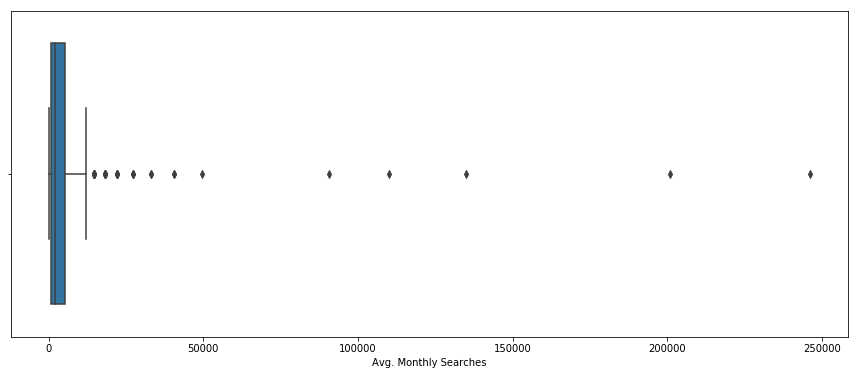

In [27]:
sns.boxplot('Avg. Monthly Searches', data=df1)

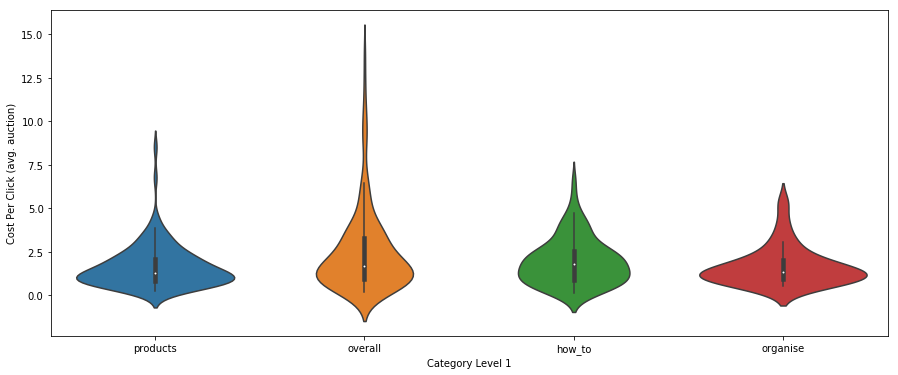

In [28]:
sns.violinplot(x="Category Level 1", y="Cost Per Click (avg. auction)", data=df1)

**Products and organise have a steeper distribuitions, meaning that on this categories the average is close to the most frequent value. For overall and how_to the distribuitions are more spread, speacilly overall with higher values. As we have seen earlier a lot of terms related to cleanning service have a high cost per click**

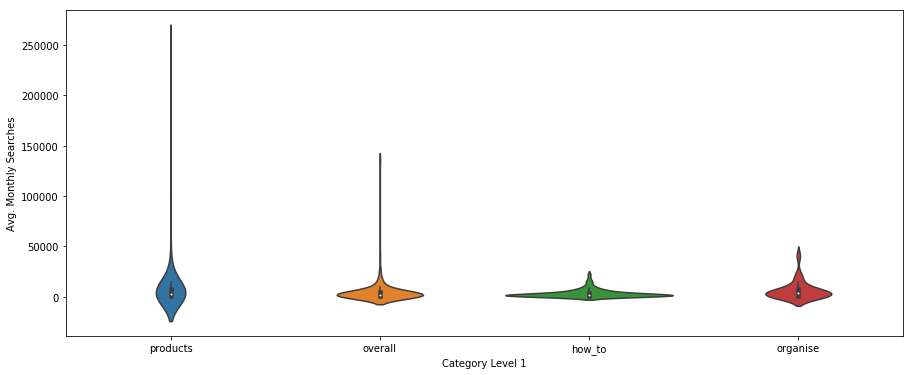

In [29]:
sns.violinplot(x="Category Level 1", y='Avg. Monthly Searches', data=df1)

**As the distribuition in every category is very skeewed and with a very  high variance this plot is not the best visualization for this variable **

Text(0.5,1,'Cost per Click vs Avg Searches')

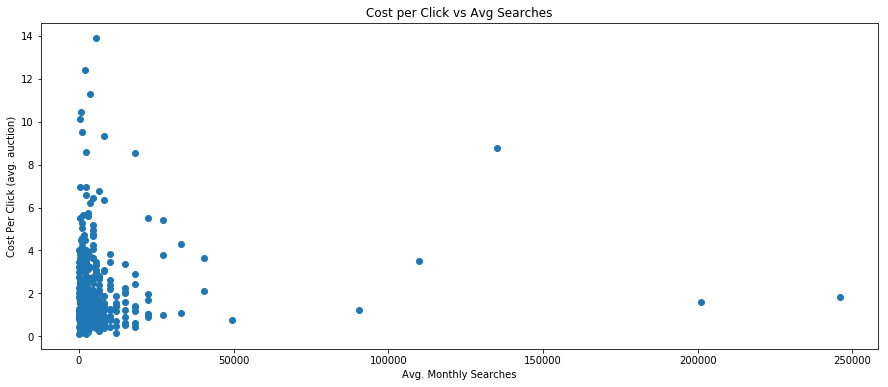

In [30]:
plt.scatter(df1['Avg. Monthly Searches'], df1['Cost Per Click (avg. auction)'])
plt.xlabel("Avg. Monthly Searches")
plt.ylabel("Cost Per Click (avg. auction)")
plt.title("Cost per Click vs Avg Searches")

**We can see that there is a relationship between the variables, however the outliers of searches could be influencing the regression line**

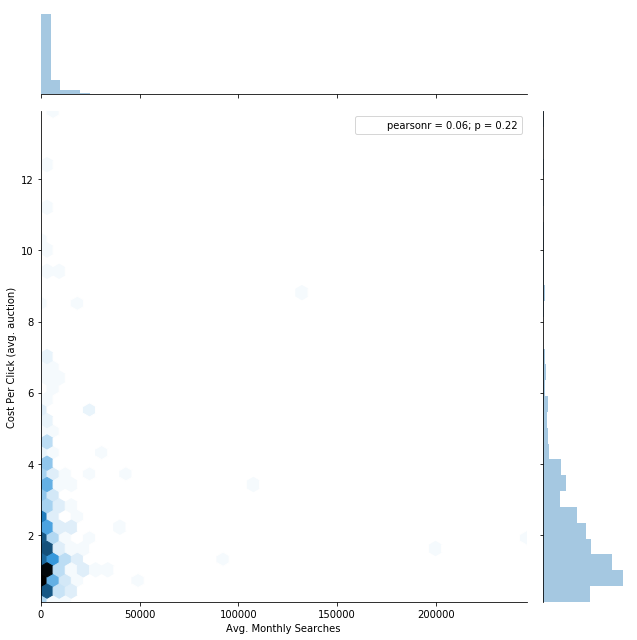

In [31]:
sns.jointplot(y="Cost Per Click (avg. auction)", x="Avg. Monthly Searches", kind="hex", data=df1, size=9);

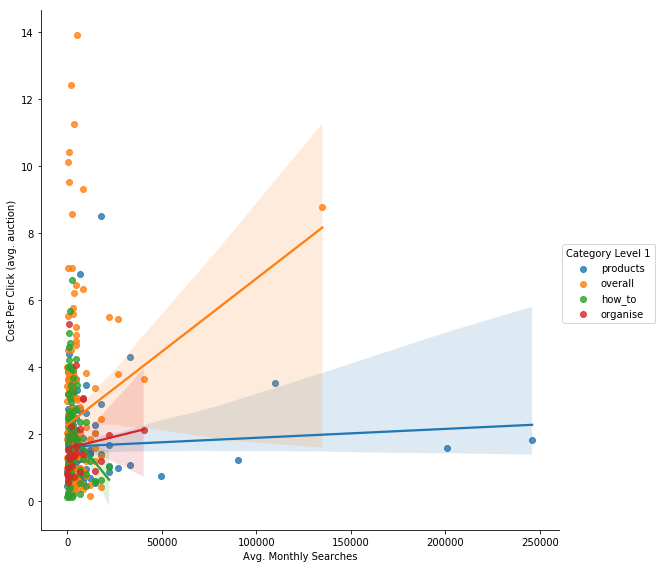

In [32]:
# Plot tip as a function of toal bill across days
sns.lmplot(y="Cost Per Click (avg. auction)", x="Avg. Monthly Searches", hue="Category Level 1", truncate=True, data=df1, size=8)
plt.show()

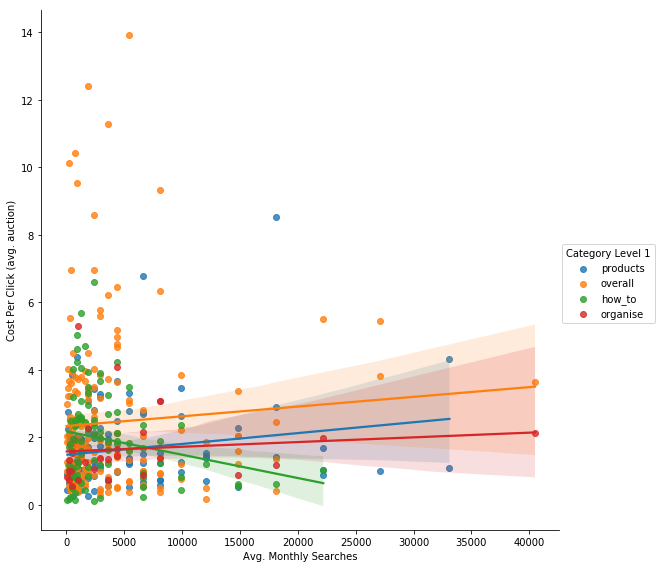

In [33]:
#The outliers have a big influence in the regression line, so we limit avg searches
df2 = df1[df1['Avg. Monthly Searches'] < 45000]
sns.lmplot(y="Cost Per Click (avg. auction)", x="Avg. Monthly Searches", hue="Category Level 1",
               truncate=True, size=8, data=df2)

## 2. Times Series Analysis

In [34]:
# Separating the second dataframe
ts = df.iloc[:,3:]

In [35]:
new_cols = [s.replace('Searches: ', '') for s in list(ts.columns)]
ts.columns = new_cols

In [36]:
ts = ts.transpose()

In [37]:
ts = ts.reset_index()

In [38]:
ts = ts.rename(columns={'index':'date'})

In [39]:
ts['date'] = pd.to_datetime(ts.date)

In [40]:
ts = ts.set_index('date')

In [41]:
ts.head()

Keyword,air duster,all purpose cleaner,aluminium cleaner,anti mould spray,antibacterial soap,antibacterial spray,antibacterial wipes,baby bottle steriliser,baby steriliser,bagless vacuum cleaner,...,washing soda,washing symbols,washing up bowl,what is oxygen bleach,window cleaning,window cleaning equipment,window cleaning products,window cleaning supplies,window cleaning tips,wood floor cleaner
date,,,,,,,,,,,,,,,,,,,,,
2013-06-01,4400,1300,590,170,9900,720,1000,260,720,5400,...,12100,12100,2400,1300,27100,2900,480,9900,1300,5400
2013-07-01,5400,1600,480,170,9900,590,1300,260,1000,3600,...,12100,12100,2900,1300,27100,5400,480,6600,880,6600
2013-08-01,5400,1600,590,170,9900,720,1900,260,1300,4400,...,12100,12100,2900,1300,22200,9900,480,3600,880,6600
2013-09-01,5400,1600,480,260,9900,720,1600,260,1300,3600,...,9900,14800,2900,1300,22200,2900,480,5400,880,5400
2013-10-01,4400,1300,390,590,9900,880,1000,260,1300,3600,...,9900,14800,2400,1000,22200,1900,480,6600,720,5400


In [42]:
ts_mean = ts.mean(axis=1).astype('int32')

In [43]:
ts_mean.tail()

date
2017-01-01    8188
2017-02-01    7308
2017-03-01    8370
2017-04-01    7931
2017-05-01    7652
dtype: int32

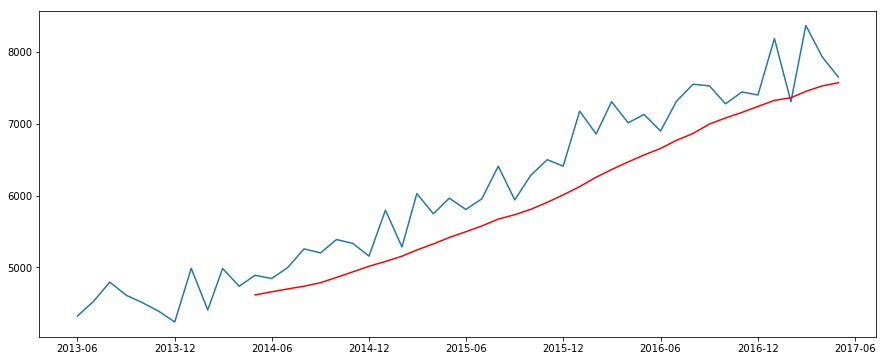

In [44]:
plt.plot(ts_mean)
moving_avg = ts_mean.rolling(window=12,center=False).mean()
plt.plot(moving_avg, color='red')

C:\Users\Usuario\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


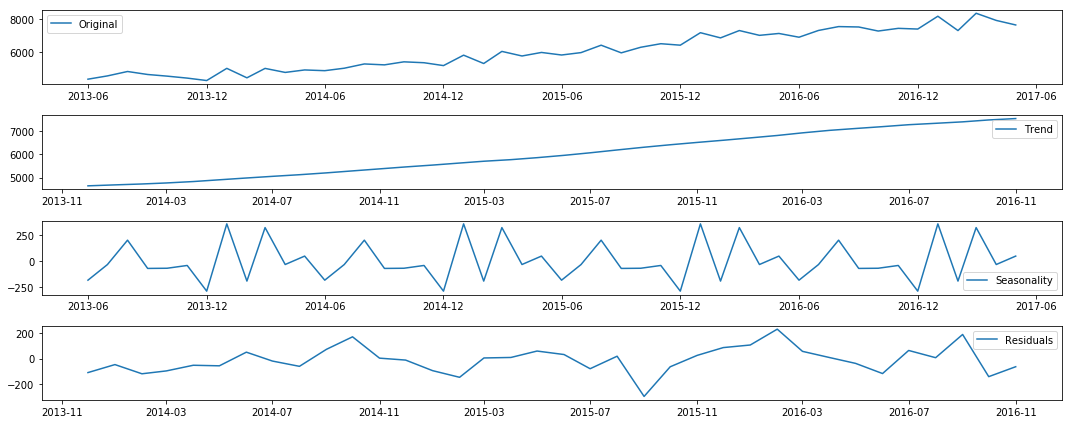

In [45]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_mean)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_mean, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [46]:
# Adjust times series to investigate which searches are detrending
ts_ma = ts.rolling(window=12,center=False).mean()
ts_ma = ts_ma.iloc[11:,:]
ts_ma = ts_ma.resample('12M', label='right').mean()
ts_ma = ts_ma.astype('int32')
ts_ma = ts_ma.transpose()
ts_ma.columns = ['y1', 'y2', 'y3', 'y4']

In [47]:
# Create dataframe of detrending searches
ts_droptrend = ts_ma.query('y1 > y2 > y3 > y4')
ts_droptrend = pd.DataFrame(ts_droptrend)
ts_droptrend['perc_drop'] = round((1-(ts_droptrend['y4']/ts_droptrend['y1']))*100)
ts_droptrend.sort_values('perc_drop',ascending=False).head(10)

,y1,y2,y3,y4,perc_drop
Keyword,,,,,
stain removal tips,595,500,266,257,57.0
patio cleaning tips,103,79,62,46,55.0
stain removal,6166,5715,5630,3095,50.0
soap making recipes,1683,1598,1256,941,44.0
organised home,306,275,228,175,43.0
window cleaning tips,772,627,548,465,40.0
cleaning games for kids,485,450,391,289,40.0
bathroom cleaning tips,803,786,712,487,39.0
household budget,5925,5669,4943,3974,33.0


Clear trend and seasonality on the searches after decomposing the times series aggregated

In [48]:
# Create data frame of uptrending searches
ts_uptrend = ts_ma.query('y1 < y2 < y3 < y4')
ts_uptrend = pd.DataFrame(ts_uptrend)
ts_uptrend['perc_up'] = round(((ts_uptrend['y4']/ts_uptrend['y1'])-1)*100)
ts_uptrend.sort_values('perc_up',ascending=False).head(10)

,y1,y2,y3,y4,perc_up
Keyword,,,,,
barbecue cleaning,140,164,172,564,303.0
makeup brush cleaner,5050,6310,11013,18998,276.0
baby bottle steriliser,304,420,741,978,222.0
robot vacuum cleaner,5675,7361,13386,17383,206.0
stain remover,2666,3016,4019,8077,203.0
fabric conditioner,820,914,1302,2300,180.0
cordless vacuum cleaner,6333,8932,16943,17496,176.0
mould spray,611,743,1060,1618,165.0
odour eliminator,207,241,364,541,161.0
